In [ ]:
#Import needed packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import time
import json 
import seaborn as sb
import math 
from datetime import datetime
from functools import reduce


from functions_for_this_analysis import haversine
from functions import haversine2



In [2]:
df_2019 = pd.read_csv('./data/201901-fordgobike-tripdata.csv')

In [4]:
df_2019.drop('bike_share_for_all_trip', axis=1, inplace=True)

In [5]:
df_2019.drop(df_2019[df_2019.start_station_id.isnull()].index, inplace = True) 

In [6]:
df_2019.shape

(191834, 13)

In [7]:
total_rows = df_2019.shape[0]
one_percent = round(total_rows / 100)
total_completed = 0


now = datetime.now().strftime("%H:%M:%S")
print("Start Time =", now)

for i, line in df_2019.iterrows():
    #Distance in meters
    distance = haversine((line['start_station_latitude'], line['start_station_longitude']), ( line['end_station_latitude'], line['end_station_longitude']))
    
    #store distance in KMs (99.9 format)
    df_2019.loc[i, 'distance'] = round(distance/1000, 1)
        
    if i % one_percent == 0:
        total_completed += 1
        print(total_completed,"% completed. Row: ", i, "Time: ",  datetime.now().strftime("%H:%M:%S"))
        
print("End time: ",  datetime.now().strftime("%H:%M:%S"))

Start Time = 17:02:34
1 % completed. Row:  0 Time:  17:02:34
2 % completed. Row:  1918 Time:  17:02:35
3 % completed. Row:  3836 Time:  17:02:37
4 % completed. Row:  5754 Time:  17:02:39
5 % completed. Row:  7672 Time:  17:02:40
6 % completed. Row:  9590 Time:  17:02:42
7 % completed. Row:  11508 Time:  17:02:43
8 % completed. Row:  13426 Time:  17:02:45
9 % completed. Row:  15344 Time:  17:02:47
10 % completed. Row:  17262 Time:  17:02:48
11 % completed. Row:  19180 Time:  17:02:50
12 % completed. Row:  21098 Time:  17:02:52
13 % completed. Row:  23016 Time:  17:02:53
14 % completed. Row:  24934 Time:  17:02:55
15 % completed. Row:  26852 Time:  17:02:57
16 % completed. Row:  28770 Time:  17:02:59
17 % completed. Row:  30688 Time:  17:03:01
18 % completed. Row:  32606 Time:  17:03:03
19 % completed. Row:  34524 Time:  17:03:05
20 % completed. Row:  36442 Time:  17:03:07
21 % completed. Row:  38360 Time:  17:03:08
22 % completed. Row:  40278 Time:  17:03:10
23 % completed. Row:  42196 

In [8]:
df_2019.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,distance
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.25646,4861,Subscriber,5.3


In [17]:
df_2019['start_time']= pd.to_datetime(df_2019['start_time']) 
df_2019['end_time']= pd.to_datetime(df_2019['end_time']) 



In [18]:
df_2019['start_time'] = pd.to_datetime(df_2019.start_time).dt.strftime('%Y-%m-%d %H:%M:%S')
df_2019['end_time'] = pd.to_datetime(df_2019.end_time).dt.strftime('%Y-%m-%d %H:%M:%S')



In [19]:
dayOfWeek = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

df_2019['day_of_the_week'] = df_2019.start_time.dt.dayofweek.map(dayOfWeek)


AttributeError: Can only use .dt accessor with datetimelike values

In [20]:
#create a column with the hour, based on the start date. to be used later to show how trips are spread over the day
df_2019['hour_of_the_day'] = round(df_2019['start_time'].dt.hour,0)


AttributeError: Can only use .dt accessor with datetimelike values

In [21]:
#create a column with the month, based on the start date. 
#to be used later to show how trips are spread over the year
df_2019['month'] = df_2019['start_time'].dt.month_name().str.slice(stop=3)


AttributeError: Can only use .dt accessor with datetimelike values

In [16]:
#create a column with the day of the month, based on the start date. 
#to be used later to show how trips are spread over the month
df_2019['day'] = df_2019['start_time'].dt.day


AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
df_2019.head(1)

In [ ]:
#OLD....WORKS, but it is stupid....
#use this intead!!!!
#dayOfWeek = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
#df_2019['day_of_the_week'] = df_2019.start_time.dt.dayofweek.map(dayOfWeek)
##create weekday column

total_rows = df_2019.shape[0]
one_percent = round(total_rows / 100)
total_completed = 0

now = datetime.now().strftime("%H:%M:%S")
print("Start Time =", now)

for i, line in df_2019.iterrows():
    
    datetime_object = datetime.strptime(line['start_time'], '%Y-%m-%d %H:%M:%S')
    

    
    weekday = datetime_object.weekday_name
    df_2019.loc[i, 'day_of_the_week'] = weekday
    print(weekday)    
    if i % one_percent == 0:
        total_completed += 1
        print(total_completed,"% completed. Row: ", i, "Time: ",  datetime.now().strftime("%H:%M:%S"))
        
print("End time: ",  datetime.now().strftime("%H:%M:%S"))

In [ ]:
df_2019.head(1)

In [ ]:
#create hour of the day column, where midnight is 0
#note that I did this separately from the step above where I have created the "day_of_the_week" column. I did so because during my tests, creating everything combined actually took longer than doing it alone.

total_rows = df_2019.shape[0]
one_percent = round(total_rows / 100)
total_completed = 0

now = datetime.now().strftime("%H:%M:%S")
print("Start Time =", now)

for i, line in df_2019.iterrows():
    
    datetime_object = datetime.strptime(line['start_time'], '%Y-%m-%d %H:%M:%S')
    df_2019.loc[i, 'hour_of_the_day'] = round(datetime_object.hour)
    weekday = datetime_object.weekday()
    df_2019.loc[i, 'day_of_the_week'] = round(weekday)
      
    if i % one_percent == 0:
        total_completed += 1
        print(total_completed,"% completed. Row: ", i, "Time: ",  datetime.now().strftime("%H:%M:%S"))
        
print("End time: ",  datetime.now().strftime("%H:%M:%S"))

In [ ]:
df_2019.head(1)

In [ ]:
#df_2019['distance'] = round (df_2019.distance / 1000, 2)

### Overview

In [ ]:
# number of trips
df_2019.shape[0]

In [ ]:
df_2019.groupby('user_type').user_type.count()

In [ ]:
df_2019.groupby('user_type').user_type.count()[0]

In [ ]:
df_2019.groupby('user_type').user_type.count()[1]

In [ ]:
# non-subs users
df_2019.groupby('user_type').user_type.count()[0] / df_2019.shape[0]

In [ ]:
#subs %
df_2019.groupby('user_type').user_type.count()[1] / df_2019.shape[0]

In [ ]:
#number of minutes avg..
df_2019.duration_sec.describe()

In [ ]:
#fazer box plot
df_2019.query('user_type == "Customer"' ).duration_sec.describe()

In [ ]:
df_2019.query('user_type == "Subscriber"' ).duration_sec.describe()

In [ ]:
plt.figure(figsize = [10,5])
base_color = sns.color_palette()[0]

sns.set(style="whitegrid")
sns.boxplot(data = df_2019, x = 'user_type', y = 'duration_sec', 
            showfliers=False, palette = 'GnBu_d').set(xlabel='User type', 
                                                     ylabel='Duration in seconds', 
                                                      title='Boxplot of trips duration by user type')
fig = plt.gcf() 
fig.savefig('box_plot_user_type_trip_duration.png',bbox_inches='tight');


In [ ]:
df_2019.head(1)

In [ ]:
plt.figure(figsize = [10,5])
base_color = sns.color_palette()[0]

sns.set(style="whitegrid")

box_plot = sns.boxplot(data = df_2019, x = 'user_type', y = 'distance', 
            showfliers=False, palette = 'BuGn_r').set(xlabel='User type', 
                                                     ylabel='Distance in meters', title='Boxplot of trips distance by user type')



fig = plt.gcf() 
fig.savefig('box_plot_user_type_trip_distance.png',bbox_inches='tight');



In [ ]:

bin_edges = np.arange(-0.5, 23.5+1, 1)
plt.hist( data = df_2019, x = 'hour_of_the_day', bins = bin_edges);
plt.xticks(np.arange(0, 24, 1));

In [ ]:
df_subscriber_week =  df_2019.query('user_type == "Subscriber" & (day_of_the_week == "Mon" | day_of_the_week == "Tue" | day_of_the_week == "Wed" | day_of_the_week == "Thu" | day_of_the_week == "Fri" )')
df_customer_week =  df_2019.query('user_type == "Customer" & (day_of_the_week == "Mon" | day_of_the_week == "Tue" | day_of_the_week == "Wed" | day_of_the_week == "Thu" | day_of_the_week == "Fri" )')

df_subscriber_weekend =  df_2019.query('user_type == "Subscriber" & (day_of_the_week == "Sat" | day_of_the_week == "Sun" )')
df_customer_weekend =  df_2019.query('user_type == "Customer" & (day_of_the_week == "Sat" | day_of_the_week == "Sun" )')

df_subscriber_week.user_type.count(),  df_customer_week.user_type.count(), df_subscriber_weekend.user_type.count(), df_customer_weekend.user_type.count()



In [ ]:
total_p_subscriber = (round(df_subscriber_week.user_type.count() / df_2019.query('day_of_the_week == "Mon" | day_of_the_week == "Tue" | day_of_the_week == "Wed" | day_of_the_week == "Thu" | day_of_the_week == "Fri"').user_type.count(), 2))*100

total_p_customer = (round(df_customer_week.user_type.count() / df_2019.query('day_of_the_week == "Mon" | day_of_the_week == "Tue" | day_of_the_week == "Wed" | day_of_the_week == "Thu" | day_of_the_week == "Fri" ').user_type.count(), 2))*100


total_p_subscriber, total_p_customer

In [ ]:

plt.figure(figsize = [16,8])


bin_edges = np.arange(-0.5, 23.5+1, 1)
sns.set(style="whitegrid")

label_subscriber = "Subscriber. Total trips 2019=" + str(df_subscriber_week.user_type.count()) + " (" + str(total_p_subscriber) + "%)"
label_customer = "Customer. Total trips 2019=" + str(df_customer_week.user_type.count()) + " (" + str(total_p_customer) + "%)"

sns.distplot(df_subscriber_week['hour_of_the_day'], kde = True, label=label_subscriber, bins = bin_edges)
sns.distplot(df_customer_week['hour_of_the_day'],kde = True, label=label_customer, bins = bin_edges)



plt.xticks(np.arange(0, 24, 1));
plt.legend(prop={'size': 12})
plt.title('Trips over the day / Monday to Friday')
plt.xlabel('Hour')
plt.ylabel('Density');

fig = plt.gcf() 
fig.savefig('histogram_usertype_over_the_day_week.png',bbox_inches='tight');

In [ ]:
total_p_subscriber = (round(df_subscriber_weekend.user_type.count() / df_2019.query('day_of_the_week == "Sat" | day_of_the_week == "Sun"').user_type.count(), 2))*100

total_p_customer = (round(df_customer_weekend.user_type.count() / df_2019.query('day_of_the_week == "Sat" | day_of_the_week == "Sun"').user_type.count(), 2))*100

total_p_subscriber, total_p_customer

In [ ]:
bin_edges = np.arange(-0.5, 23.5+1, 1)
plt.figure(figsize = [20,10])


label_subscriber = "Subscriber. Total trips 2019=" + str(df_subscriber_weekend.user_type.count()) + " (" + str(total_p_subscriber) + "%)"
label_customer = "Customer. Total trips 2019=" + str(df_customer_weekend.user_type.count()) + " (" + str(total_p_customer) + "%)"


sns.distplot(df_subscriber_weekend['hour_of_the_day'], kde = True, label=label_subscriber, bins = bin_edges)
sns.distplot(df_customer_weekend['hour_of_the_day'], kde = True, label=label_customer, bins = bin_edges)

plt.legend(prop={'size': 12})
plt.title('Trips over the day / Weekends')
plt.xlabel('Hour')
plt.ylabel('Density');
plt.xticks(np.arange(0, 24, 1));

fig = plt.gcf() 
fig.savefig('histogram_usertype_over_the_day_weekends.png',bbox_inches='tight');




In [ ]:
df_subscriber =  df_2019.query('user_type == "Subscriber"')
df_customer =  df_2019.query('user_type == "Customer"')

total_p_subscriber = (round(df_subscriber.user_type.count() / df_2019.user_type.count(), 2))*100
total_p_customer = (round(df_customer.user_type.count() / df_2019.user_type.count(), 2))*100

df_subscriber.user_type.count(),  df_customer.user_type.count(), total_p_subscriber, total_p_customer                

In [ ]:
df_2019.head(1)

In [ ]:
#FAZER ESSE GRAFICO, AGORA 1 PARA CADA MES

#sns.catplot(x="day_of_the_week", kind = "count", hue='user_type', palette = "pastel", data = df_2019);
plt.figure(figsize = [8,3])


sns.countplot(x="day_of_the_week",hue='user_type', palette = "pastel", order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], data = df_2019);


plt.title('Average trip distribution over the week')
plt.ylabel('Density');

fig = plt.gcf() 
fig.savefig('histogram_usertype_week_spread.png',bbox_inches='tight');




In [ ]:
plt.figure(figsize = [8,3])


sns.countplot(x="month", hue='user_type', palette = "pastel", 
              order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov', 'Dec'], 
              data = df_2019);


plt.title('Average trip distribution over the week')
plt.ylabel('Trips');

fig = plt.gcf() 
fig.savefig('histogram_usertype_week_spread.png',bbox_inches='tight');




In [ ]:
df_2019.head(1)

### Service

In [70]:
#1

df_2019.start_station_id.nunique()

324

In [82]:
#2 - And what are the most and less common (used) stations 
#that users grab a bike (start trip stations)?
#(#10 Relative frequency 90 graus, Bar chart)

#list = df_2019.groupby('start_station_name').start_station_id.count()

In [83]:
#list

start_station_name
10th Ave at E 15th St                                     67
10th St at Fallon St                                     361
10th St at University Ave                                264
11th St at Bryant St                                     914
11th St at Natoma St                                     921
                                                        ... 
Williams Ave at Apollo St                                 39
Willow St at Vine St                                      12
Woolsey St at Sacramento St                              307
Woolsey St at Sacramento St1                               7
Yerba Buena Center for the Arts (Howard St at 3rd St)    972
Name: start_station_id, Length: 324, dtype: int64

In [100]:
station_order = df_2019['start_station_name'].value_counts().index

station_order

Index(['Market St at 10th St',
       'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'Montgomery St BART Station (Market St at 2nd St)',
       'Berry St at 4th St',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'Powell St BART Station (Market St at 4th St)',
       'San Francisco Caltrain (Townsend St at 4th St)',
       'Howard St at Beale St', 'Steuart St at Market St',
       'Powell St BART Station (Market St at 5th St)',
       ...
       'Foothill Blvd at 42nd Ave', 'Oak St at 1st St',
       '26th Ave at International Blvd', 'Farnam St at Fruitvale Ave',
       '21st Ave at International Blvd', 'Willow St at Vine St',
       'George St at 1st St', 'Alamo Square (Steiner St at Fulton St)',
       'Woolsey St at Sacramento St1', 'Palm St at Willow St'],
      dtype='object', length=324)

In [1]:
#Number of trips in the year
df_2019['start_station_name'].value_counts().plot(kind = 'barh',  figsize=(20,100))
#plt.xlabel('Number of trips in the year')
#plt.ylabel('Station initiating the trip ended');

fig = plt.gcf() 
fig.savefig('starting_stations_trips_in_the_year.png',bbox_inches='tight');

NameError: name 'df_2019' is not defined

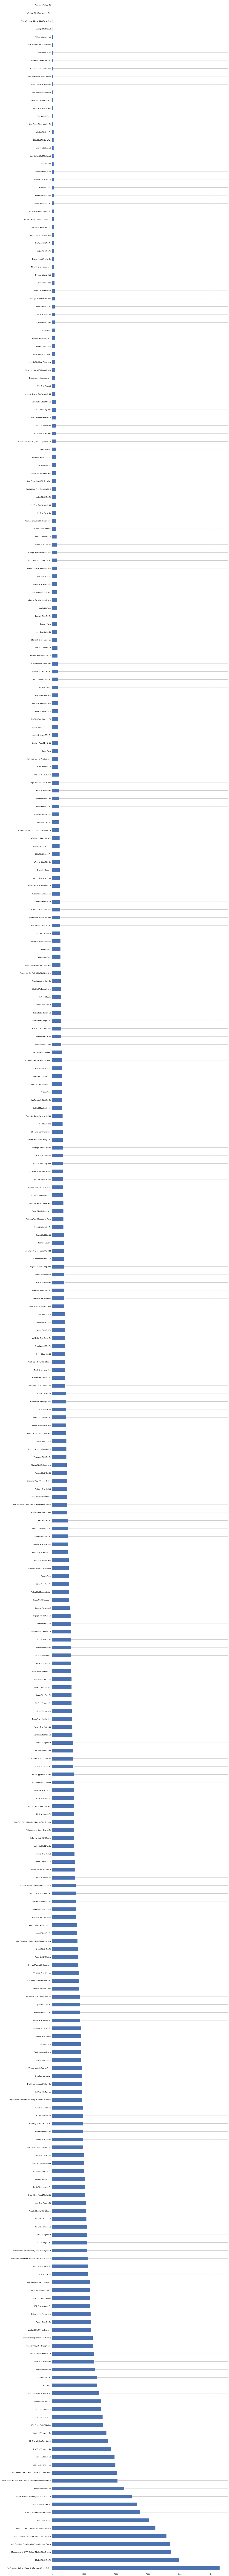

In [197]:
#Number of trips in the year
df_2019['end_station_name'].value_counts().plot(kind = 'barh',  figsize=(20,300))
#plt.xlabel('Number of trips in the year')
#plt.ylabel('Station where trip has ended');

fig = plt.gcf() 
fig.savefig('ending_stations_trips_in_the_year.png',bbox_inches='tight');

It shows that volume of trips starting in a place is quite different on where it ends. This means that some manual feeding of bike in some stations are required.

In [205]:
df_2019.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,distance,hour_of_the_day,day_of_the_week
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.25646,4861,Subscriber,No,5307.0,17.0,3.0


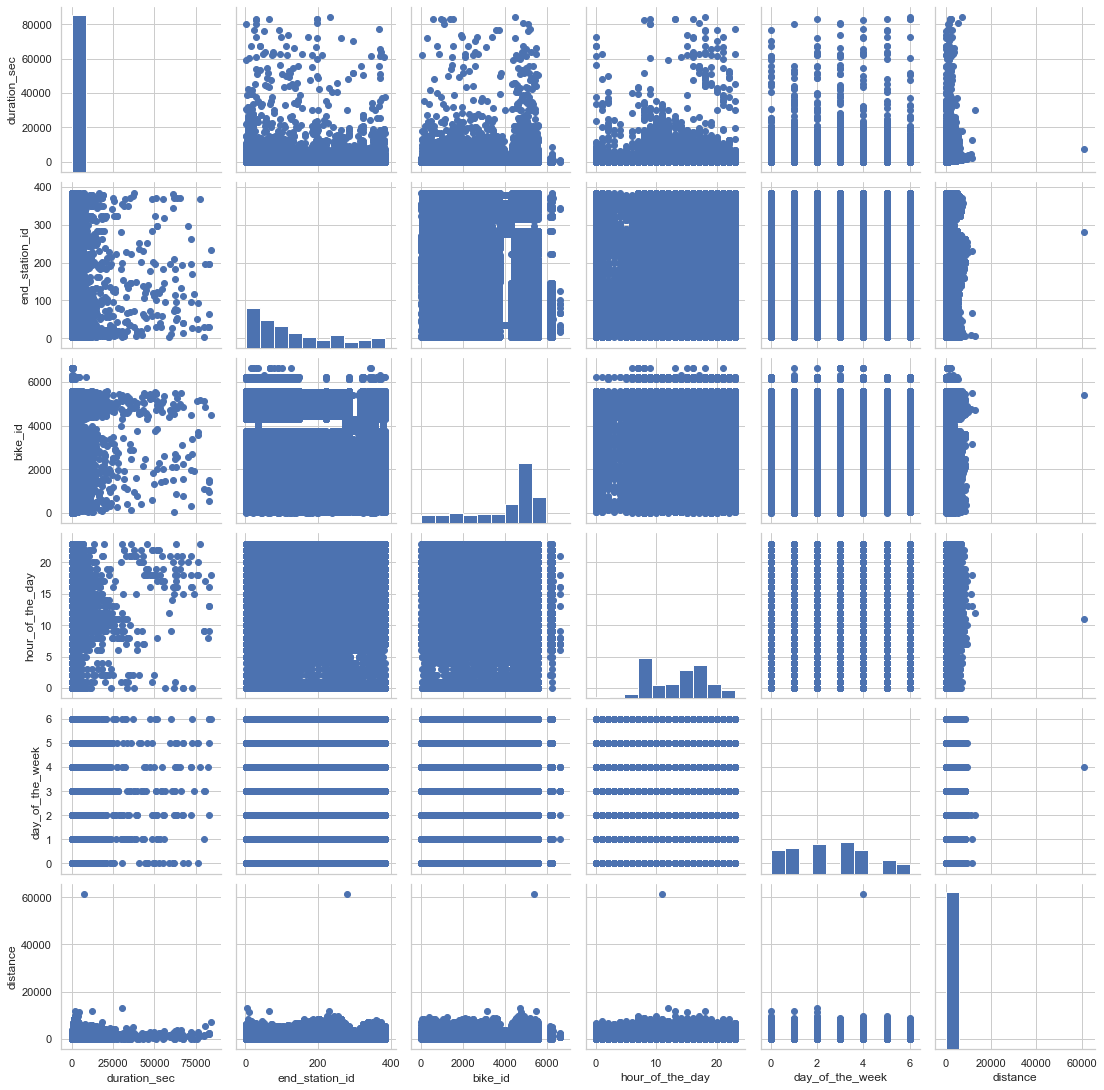

In [201]:
g = sns.PairGrid(data = df_2019, vars = ['duration_sec', 'end_station_id', 'bike_id', 'hour_of_the_day','day_of_the_week', 'distance'])

g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

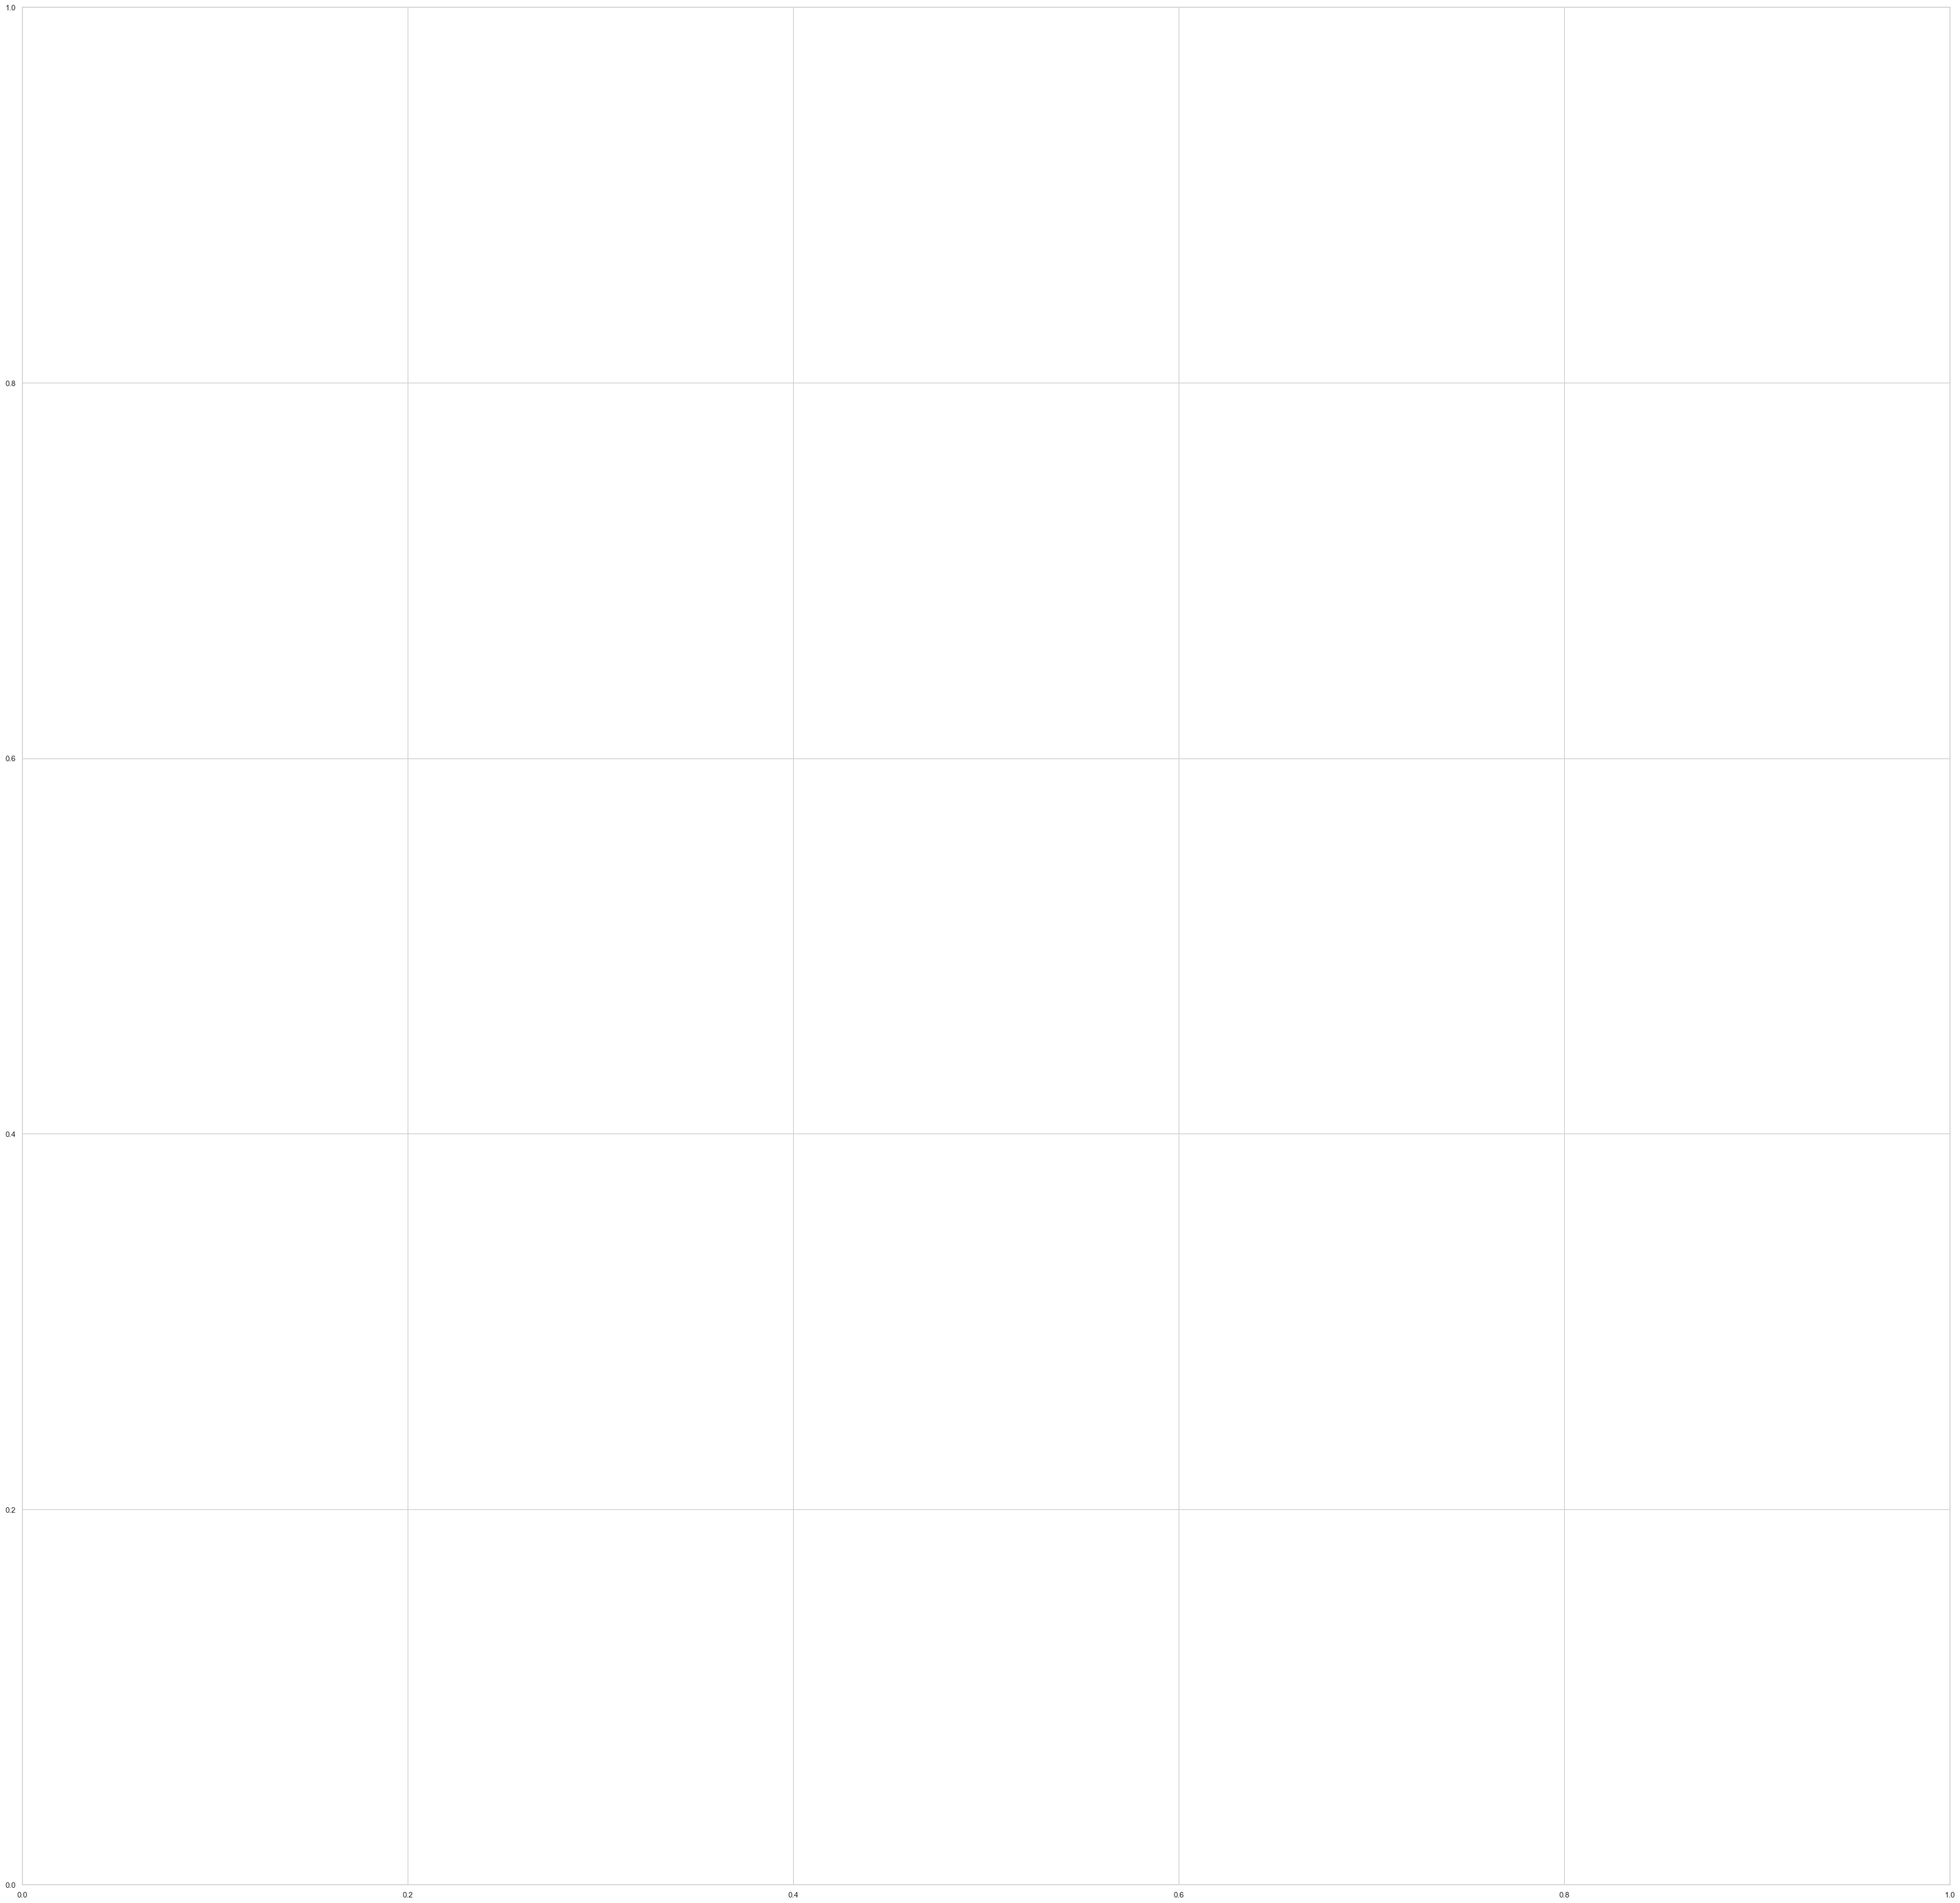

In [208]:
#NAO USAR
plt.figure(figsize = [50,50])

bins_x = np.arange(0.5, 10.5+1, 1)
bins_y = np.arange(-0.5, 10.5+1, 1)
plt.hist2d(data = df_2019, x = 'start_station_id', y = 'end_station_id')
           #bins = [bins_x, bins_y])
plt.colorbar()
fig = plt.gcf() 
fig.savefig('heatmap_start_end_stations.png',bbox_inches='tight');



In [209]:

#how many bicycles the service provides

#nao usar. pq pode entrar e sair bikes para manutencao e nao tem como saber.
df_2019.bike_id.nunique()

3757

In [210]:
df_2019.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,distance,hour_of_the_day,day_of_the_week
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.25646,4861,Subscriber,No,5307.0,17.0,3.0


In [213]:
df_2019['duration_min'] = round(df_2019.duration_sec / 60)

In [214]:
df_2019.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,distance,hour_of_the_day,day_of_the_week,duration_min
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.25646,4861,Subscriber,No,5307.0,17.0,3.0,1347.0


In [ ]:
list = df_2019.groupby('month').bike_id.nunique()
list

In [ ]:
numpy_data = np.array([['Jan', 3749], ['Feb', 4601], ['Mar', 4375], ['Apr',4482 ], ['May', 2841], ['Jun', 2957], ['Jul', 2957], ['Aug', 4008], ['Sep', 5325], ['Oct', 5417], ['Nov', 5159],['Dec', 5514] ])
df = pd.DataFrame(data=numpy_data, index=[0,1, 2,3,4,5,6,7,8,9,10,11], columns=["month", "bikes"])
print(df)

In [ ]:
plt.figure(figsize = [12,6])
sns.set(style="whitegrid")

sns.barplot(x="month",y="bikes",  palette = "GnBu_d" , data = df);


plt.title('Number of unieque bikes used every month')
plt.ylabel('Unique bikes every month');
plt.xlabel('');